# Testing GNN Training

In [1]:
%load_ext autoreload
%autoreload 2

# System imports
import os
import sys
import yaml

# External imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

import torch
from torch_geometric.data import Data
from torch.utils.data import DataLoader, Dataset
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger, WandbLogger
import scipy as sp
import wandb

import warnings

warnings.filterwarnings("ignore")
sys.path.append("../")
device = "cuda" if torch.cuda.is_available() else "cpu"

from lightning_modules.toyGNN.submodels.vanilla_embedding import VanillaEmbedding

In [5]:
# load config
with open("toy_config.yaml", "r") as f:
    config = yaml.safe_load(f)

In [6]:
model = VanillaEmbedding(config)

## Test Dataloading

In [4]:
model.setup(stage="fit")

In [5]:
sample = model.valset[0]

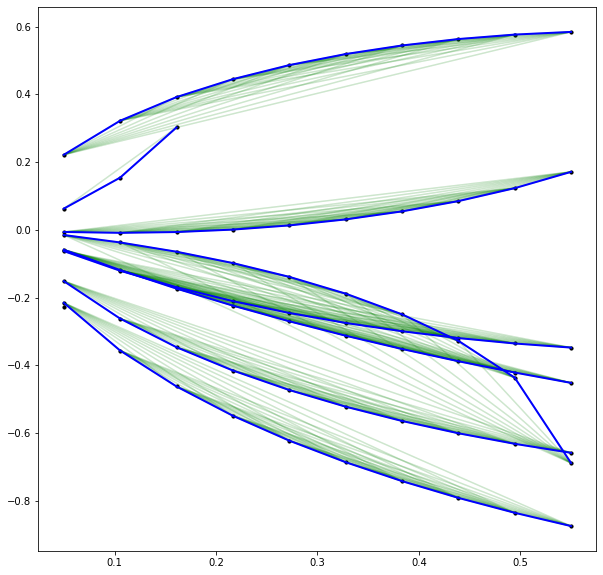

In [6]:
# Plot the graph
def plot_graph(sample):
    truth_mask = sample.y == 1
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(sample.x[:,0], sample.x[:,1], s=10, c="k")
    ax.plot(sample.x[sample.all_signal_edges,0], sample.x[sample.all_signal_edges,1], c='g', alpha=0.1)
    ax.plot(sample.x[sample.seq_signal_edges,0], sample.x[sample.seq_signal_edges,1], c='b', alpha=1, linewidth=2)
    plt.show()

plot_graph(sample)

## Train Model

In [8]:
logger = WandbLogger(
    project=config["project"], group="InitialTest", save_dir=config["artifacts"]
)
trainer = Trainer(
    gpus=1, max_epochs=config["max_epochs"], logger=logger, num_sanity_val_steps=0
)
trainer.fit(model)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


tensor([0.0033, 0.0131, 0.0298, 0.0535, 0.0844, 0.1228, 0.1690, 0.2234, 0.2864,
        0.0033, 0.0033, 0.0134, 0.0304, 0.0545, 0.0861, 0.1255, 0.1730, 0.2291,
        0.0131, 0.0033, 0.0034, 0.0136, 0.0310, 0.0558, 0.0882, 0.1287, 0.1777,
        0.0298, 0.0134, 0.0034, 0.0034, 0.0139, 0.0317, 0.0572, 0.0906, 0.1324,
        0.0535, 0.0304, 0.0136, 0.0034, 0.0035, 0.0143, 0.0326, 0.0588, 0.0932,
        0.0844, 0.0545, 0.0310, 0.0139, 0.0035, 0.0036, 0.0147, 0.0335, 0.0606,
        0.1228, 0.0861, 0.0558, 0.0317, 0.0143, 0.0036, 0.0037, 0.0151, 0.0346,
        0.1690, 0.1255, 0.0882, 0.0572, 0.0326, 0.0147, 0.0037, 0.0038, 0.0157,
        0.2234, 0.1730, 0.1287, 0.0906, 0.0588, 0.0335, 0.0151, 0.0038, 0.0040,
        0.2864, 0.2291, 0.1777, 0.1324, 0.0932, 0.0606, 0.0346, 0.0157, 0.0040,
        0.0091, 0.0300, 0.0580, 0.0912, 0.1287, 0.1699, 0.2144, 0.2621, 0.3129,
        0.0091, 0.0061, 0.0216, 0.0439, 0.0717, 0.1043, 0.1413, 0.1823, 0.2275,
        0.0300, 0.0061, 0.0048, 0.0175, 

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 795 K 
---------------------------------------
795 K     Trainable params
0         Non-trainable params
795 K     Total params
3.183     Total estimated model params size (MB)


Epoch 0:  91%|█████████ | 100/110 [00:00<00:00, 109.35it/s, loss=0.00848, v_num=ikuo]tensor([0.0002, 0.0002, 0.0005,  ..., 0.0003, 0.0085, 0.0067])
tensor(0.0458) tensor(0.0995)
tensor([8.5487e-05, 1.2410e-04, 2.5878e-04,  ..., 1.0922e-04, 3.1930e-03,
        2.4850e-03])
tensor(0.0300) tensor(0.0737)
Epoch 1:  91%|█████████ | 100/110 [00:00<00:00, 109.79it/s, loss=0.00844, v_num=ikuo]tensor([0.0005, 0.0009, 0.0013,  ..., 0.0045, 0.0032, 0.0020])
tensor(0.0460) tensor(0.0998)
tensor([0.0003, 0.0005, 0.0007,  ..., 0.0019, 0.0013, 0.0008])
tensor(0.0317) tensor(0.0772)
Epoch 2:  91%|█████████ | 100/110 [00:00<00:00, 107.80it/s, loss=0.00832, v_num=ikuo]tensor([1.8650e-04, 3.4552e-04, 7.5490e-04, 1.2895e-03, 1.9025e-03, 2.5840e-03,
        3.3427e-03, 4.1893e-03, 5.1374e-03, 6.2167e-03, 1.9587e-03, 2.8534e-03,
        3.9711e-03, 5.3158e-03, 8.1570e-03, 6.7694e-03, 5.4944e-03, 4.3141e-03,
        1.0237e-04, 2.4293e-04, 4.5220e-04, 7.8356e-04, 1.2750e-03, 9.6842e-03,
        1.0237e-04, 5

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 110/110 [00:02<00:00, 44.47it/s, loss=0.00852, v_num=ikuo]


In [9]:
import plotly.graph_objects as go

In [27]:
x = torch.randn(100, 8)
edges = torch.randint(0, 100, (2, 100))

fig = go.Figure()

# Plot x
fig.add_trace(go.Scatter(x=x[:,0], y=x[:,1], mode='markers', marker=dict(color='black', size=5)))

# Plot edges
for edge in edges.T:
    fig.add_trace(go.Scatter(x=x[edge,0], y=x[edge,1], mode='lines', line=dict(color='red', width=1)))

# # Plot circles
for point in x:
    fig.add_shape(  # add a circle
        type="circle",
        xref="x", yref="y",
        x0=point[0]-0.1, y0=point[1]-0.1, x1=point[0]+0.1, y1=point[1]+0.1,
        line_color="LightSeaGreen",
    )

fig.show()

In [2]:
x = torch.randn(100, 3)
x = torch.nn.functional.normalize(x)
edges = torch.randint(0, 100, (2, 100))

In [3]:
d = torch.sum((x[edges[0]] - x[edges[1]])**2, dim=1)

In [53]:
hinge = torch.rand(edges.shape[1]).float() > 0.5
hinge = hinge.float()
hinge[hinge == 0] = -1

In [54]:
torch.nn.functional.hinge_embedding_loss(d, hinge, reduction='mean', margin=0.5)

tensor(0.9506)

In [55]:
true_mask = hinge == 1
false_mask = hinge == -1

In [56]:
true_loss = d[true_mask]
false_loss = torch.stack([0.5 - d[false_mask], torch.zeros_like(d[false_mask])], dim=1).max(dim=1)[0]

In [59]:
torch.cat([true_loss, false_loss]).mean()

tensor(0.9506)

In [69]:
torch.stack([0.5 - d, torch.zeros_like(d)], dim=1).max(dim=1)[0]

tensor([0.0000, 0.0000, 0.0000, 0.1684, 0.0000, 0.0000, 0.0000, 0.1235, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3985, 0.0000,
        0.0000, 0.2971, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.2215, 0.0000, 0.0000, 0.0000, 0.0932,
        0.3696, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.2054, 0.0000, 0.0000, 0.0000, 0.4341, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4375,
        0.0000, 0.0000, 0.4645, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0842, 0.5000, 0.0000, 0.0000,
        0.1416, 0.4964, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4748,
        0.0000])

In [65]:
d[true_mask]

tensor([3.8501e+00, 1.5419e+00, 3.0575e+00, 1.4566e+00, 3.2615e+00, 2.1660e+00,
        3.3902e+00, 6.8264e-01, 2.0293e-01, 2.0288e+00, 3.2302e+00, 1.6368e+00,
        1.3949e+00, 3.3890e+00, 3.9464e+00, 2.7845e-01, 2.6302e+00, 3.1584e+00,
        2.5660e+00, 2.0081e+00, 2.3760e+00, 7.9904e-01, 3.4467e+00, 1.9252e+00,
        3.3941e+00, 3.2667e+00, 3.9301e+00, 6.5854e-02, 6.4182e-01, 2.3033e+00,
        1.1864e+00, 6.2489e-02, 9.1363e-01, 2.7786e+00, 1.1429e+00, 3.2587e+00,
        1.4417e+00, 3.5505e-03, 3.5101e+00, 3.5418e+00, 1.5526e+00, 2.9176e+00,
        2.5197e-02, 2.1497e+00])

In [7]:
(1 - torch.exp(-d/0.5**2)).prod()

tensor(3.0991e-07)